<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/CustomerClassification_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Classification Model**

# **1. Introduction**
Company Introduction:

Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

Current Scenario:

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.


# **2. Problem Statement**

The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

# **3.Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate,KFold
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings(action="ignore")

# **4. Data Acquisition & Description**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/custclass_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/custclass_test.csv")


data.head(10)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,...,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,...,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,...,24.47,0.00,0.00,Male,North West,0.00,6.74,6.74,8.60,2


### **Dataset Description**




In [ ]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


### **Dataset Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

# **5. Data Pre-Processing**

### **Check value "0" in column**

In [ ]:
print((data["Portfolio_Balance"]<0).sum(), "\n")

852 



In [ ]:
print((data==0).sum(), "\n")


REF_NO                                0
children                              0
age_band                              0
status                                0
occupation                            0
occupation_partner                    0
home_status                           0
family_income                         0
self_employed                         0
self_employed_partner                 0
year_last_moved                      69
TVarea                                0
post_code                             0
post_area                             0
Average_Credit_Card_Transaction    4989
Balance_Transfer                   3524
Term_Deposit                       4587
Life_Insurance                     2454
Medical_Insurance                  4046
Average_A/C_Balance                2806
Personal_Loan                      5134
Investment_in_Mutual_Fund          2602
Investment_Tax_Saving_Bond         5133
Home_Loan                          5609
Online_Purchase_Amount             5700


In [ ]:
print((data=="Unknown").sum(), "\n")


REF_NO                                0
children                              0
age_band                             44
status                               40
occupation                          449
occupation_partner                 1942
home_status                           0
family_income                       108
self_employed                         0
self_employed_partner                 0
year_last_moved                       0
TVarea                              154
post_code                             0
post_area                             0
Average_Credit_Card_Transaction       0
Balance_Transfer                      0
Term_Deposit                          0
Life_Insurance                        0
Medical_Insurance                     0
Average_A/C_Balance                   0
Personal_Loan                         0
Investment_in_Mutual_Fund             0
Investment_Tax_Saving_Bond            0
Home_Loan                             0
Online_Purchase_Amount                0


In [ ]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


### **Detect Outliers and distribution of features**

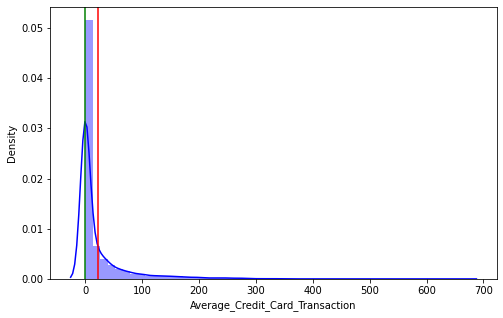

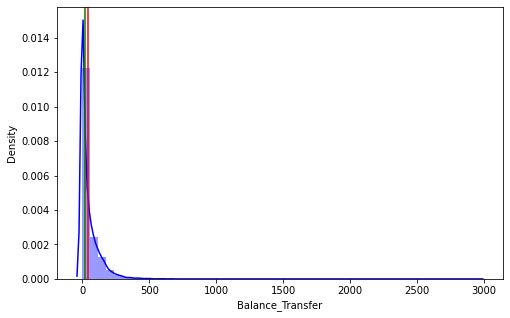

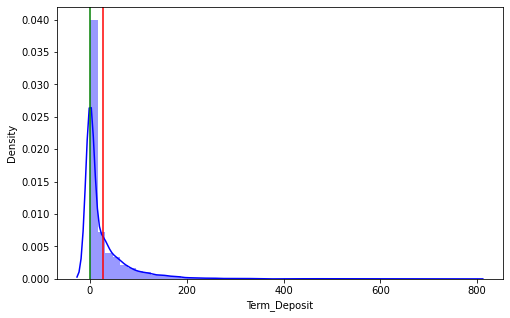

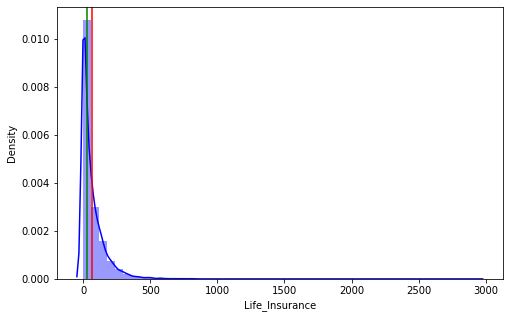

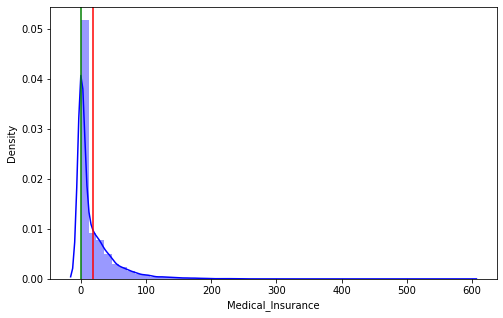

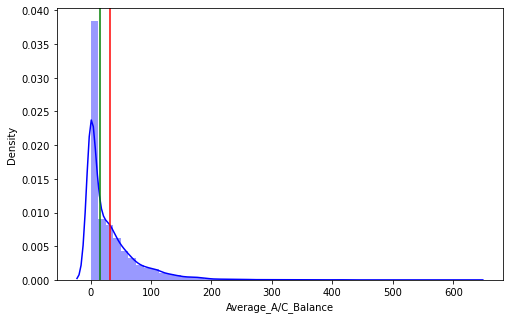

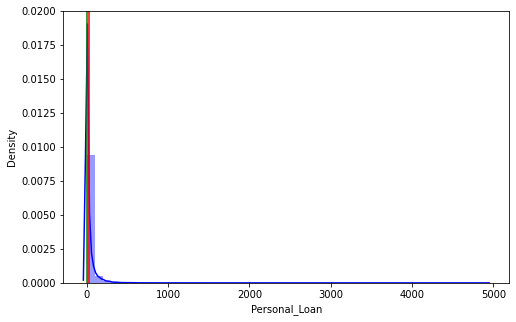

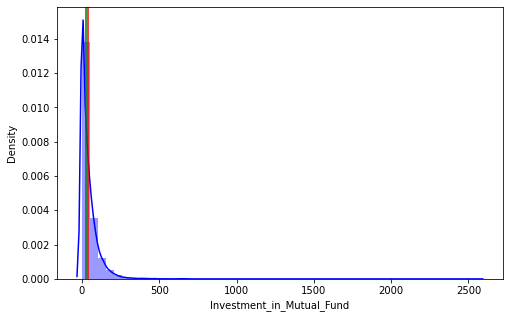

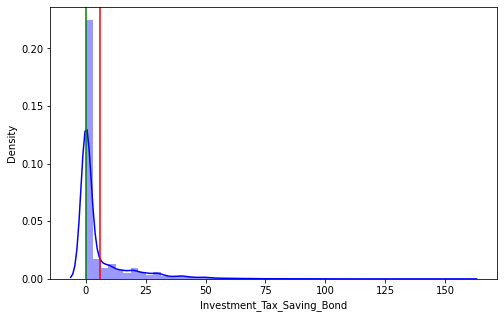

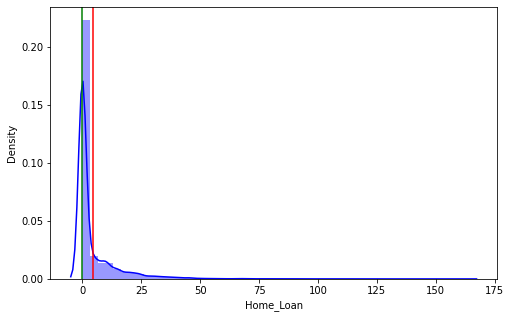

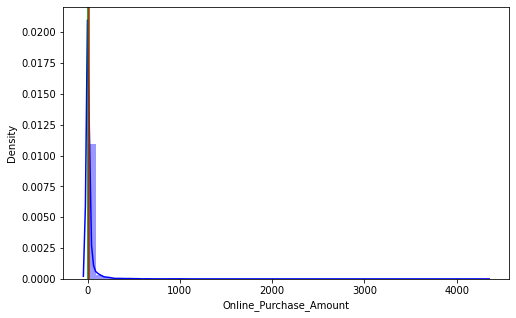

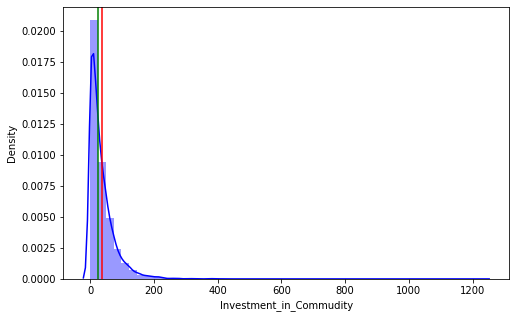

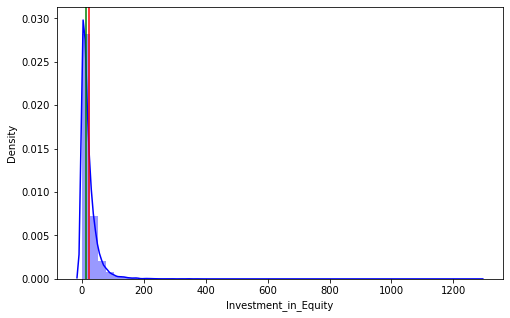

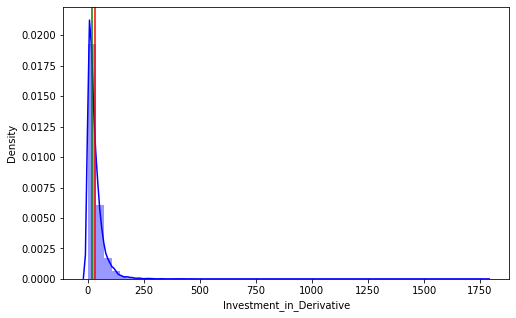

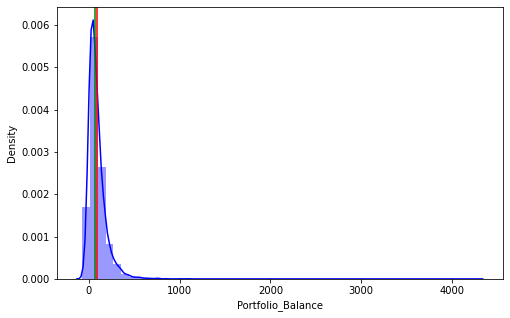

In [ ]:
Contcolumn=["Average_Credit_Card_Transaction","Balance_Transfer","Term_Deposit","Life_Insurance","Medical_Insurance","Average_A/C_Balance","Personal_Loan",
            "Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Home_Loan","Online_Purchase_Amount","Investment_in_Commudity","Investment_in_Equity",
            "Investment_in_Derivative","Portfolio_Balance"]
for col in Contcolumn:
  fig=plt.figure(figsize=[8,5])
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")



## **Feature Engineering**

In [ ]:
data["TotalInvestment"]=data["Term_Deposit"]+data["Investment_in_Mutual_Fund"]+data["Investment_Tax_Saving_Bond"]+data["Investment_in_Commudity"]+data["Investment_in_Equity"]
+data["Investment_in_Derivative"]
data["TotalLoan"]=data["Personal_Loan"]+data["Home_Loan"]

dataTest["TotalInvestment"]=dataTest["Term_Deposit"]+dataTest["Investment_in_Mutual_Fund"]+dataTest["Investment_Tax_Saving_Bond"]+dataTest["Investment_in_Commudity"]+dataTest["Investment_in_Equity"]
+dataTest["Investment_in_Derivative"]
dataTest["TotalLoan"]=dataTest["Personal_Loan"]+dataTest["Home_Loan"]
data.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,TotalInvestment,TotalLoan
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,7.68,Female,North West,151.55,81.79,136.02,360.37,2,688.92,230.87
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,18.99,Female,North West,44.28,13.91,29.23,89.22,2,58.19,15.99
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,Female,South West,8.58,1.75,4.82,14.50,2,20.79,0.02
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2,15.00,0.00
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2,11.64,0.00


# **6. Exploratory Data Analysis**

### **Check the distribution of different features**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

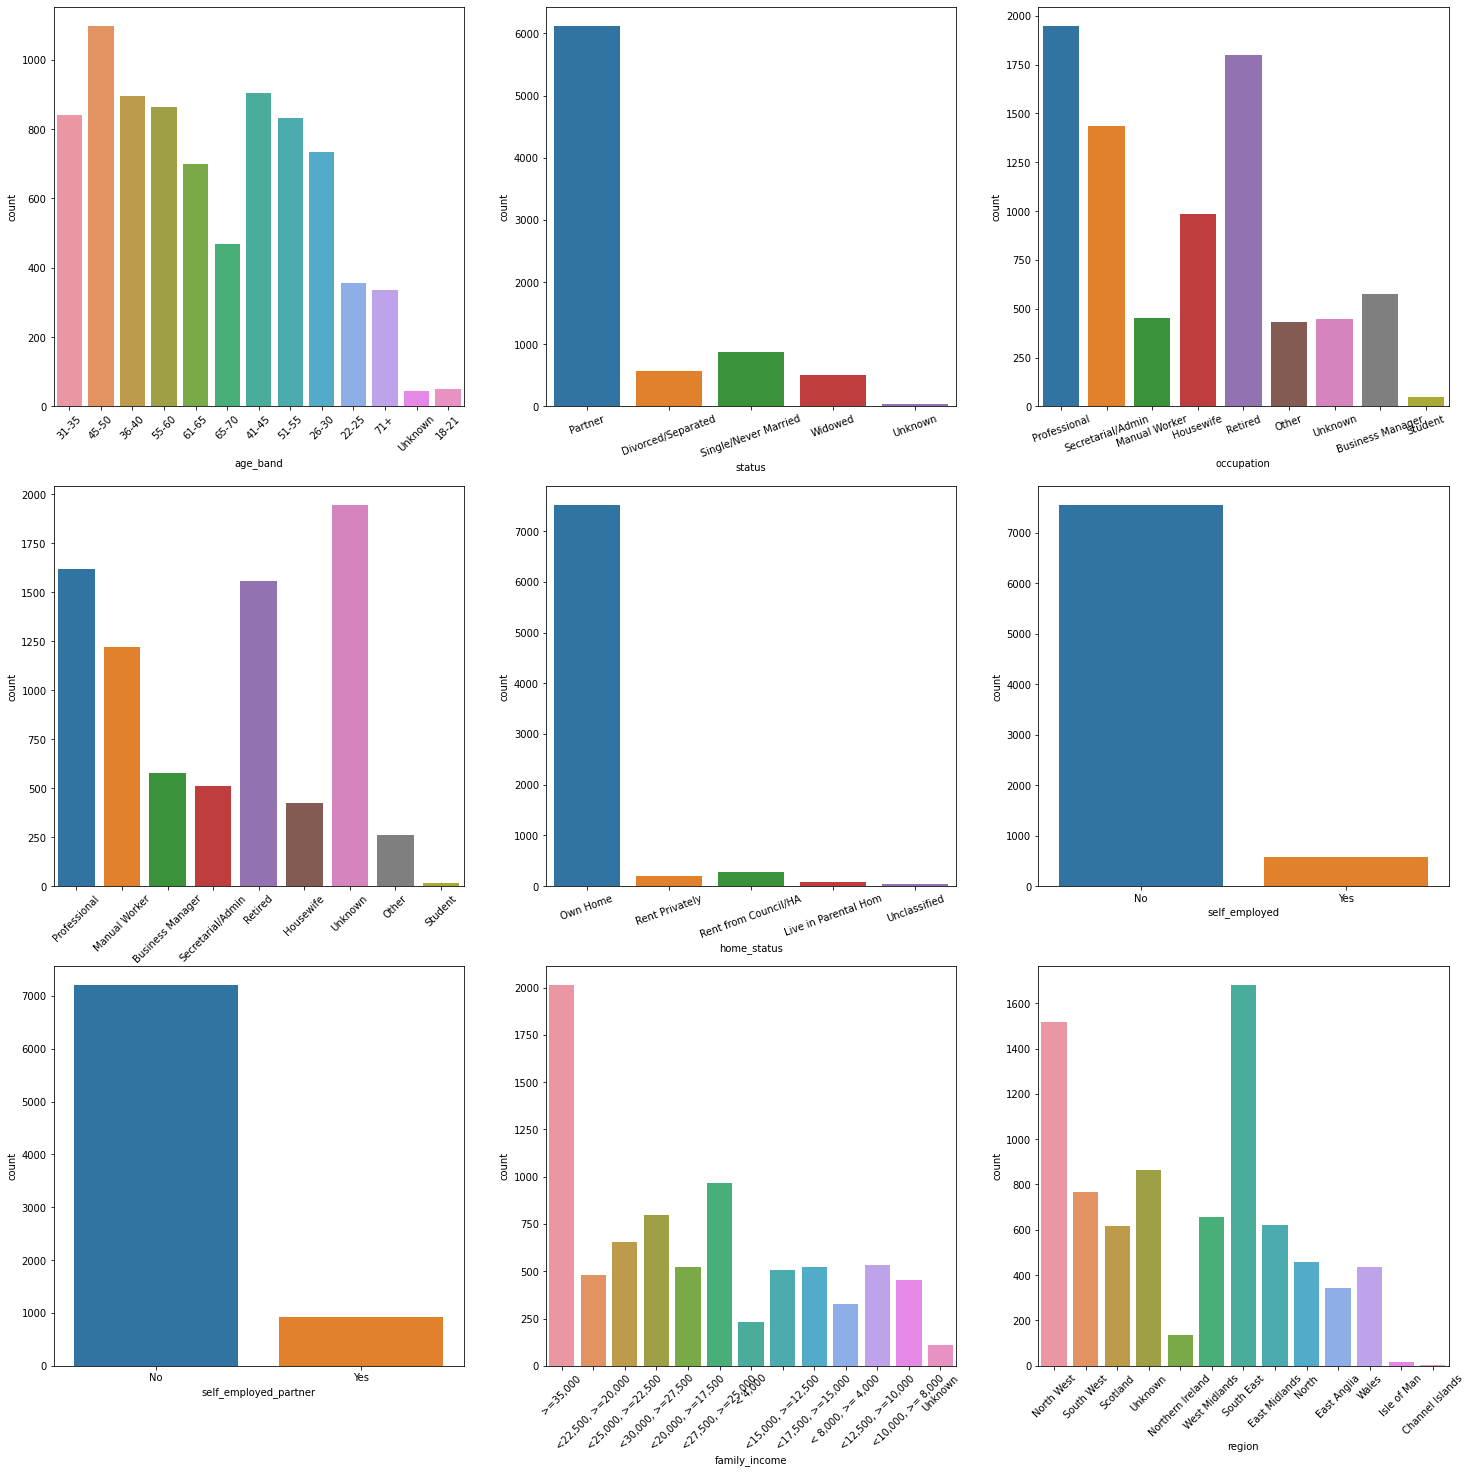

In [ ]:
fig=plt.figure(figsize=[25,25])
plt.subplot(3,3,1)
sns.countplot(x="age_band",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,2)
sns.countplot(x="status",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,3)
sns.countplot(x="occupation",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,4)
sns.countplot(x="occupation_partner",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.countplot(x="home_status",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,6)
sns.countplot(x="self_employed",data=data)
plt.subplot(3,3,7)
sns.countplot(x="self_employed_partner",data=data)
plt.subplot(3,3,8)
sns.countplot(x="family_income",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,9)
sns.countplot(x="region",data=data)
plt.xticks(rotation=45)

# sns.countplot(x="gender",data=data)
# plt.xticks(rotation=45)
# plt.show()



## **Analyzing parameters of High worth Customer (Revenue_Grid=1)**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

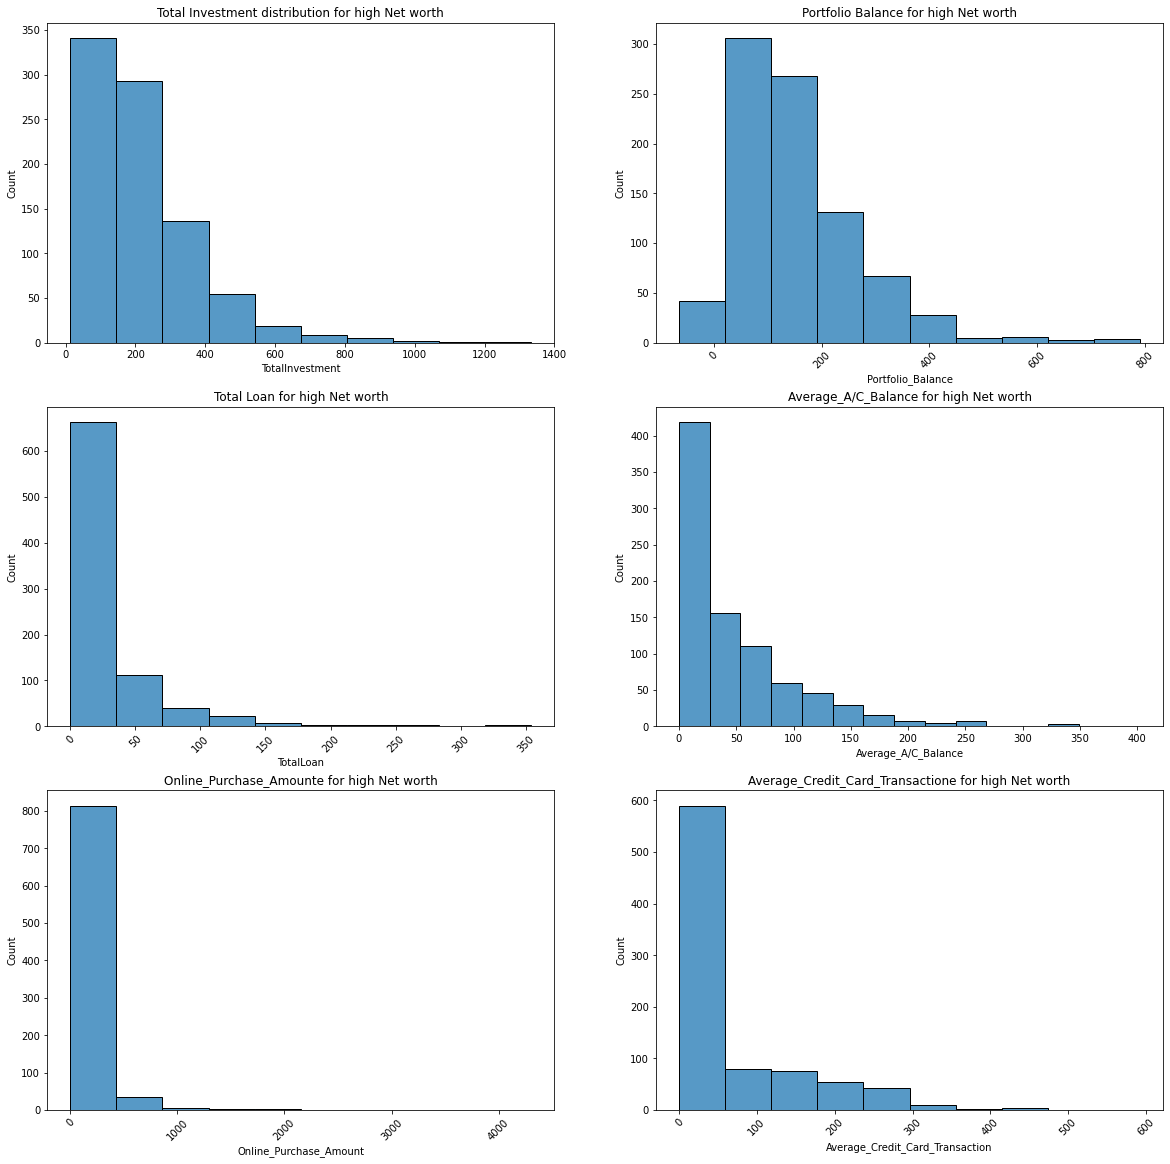

In [ ]:
fig=plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.histplot(x="TotalInvestment",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Total Investment distribution for high Net worth")

plt.subplot(3,2,2)
sns.histplot(x="Portfolio_Balance",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Portfolio Balance for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,3)
sns.histplot(x="TotalLoan",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Total Loan for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,4)
sns.histplot(x="Average_A/C_Balance",bins=15, data=data[data.Revenue_Grid==1])
plt.title("Average_A/C_Balance for high Net worth")

plt.subplot(3,2,5)
sns.histplot(x="Online_Purchase_Amount",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Online_Purchase_Amounte for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,6)
sns.histplot(x="Average_Credit_Card_Transaction",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Average_Credit_Card_Transactione for high Net worth")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Avg Investment Gender Wise')

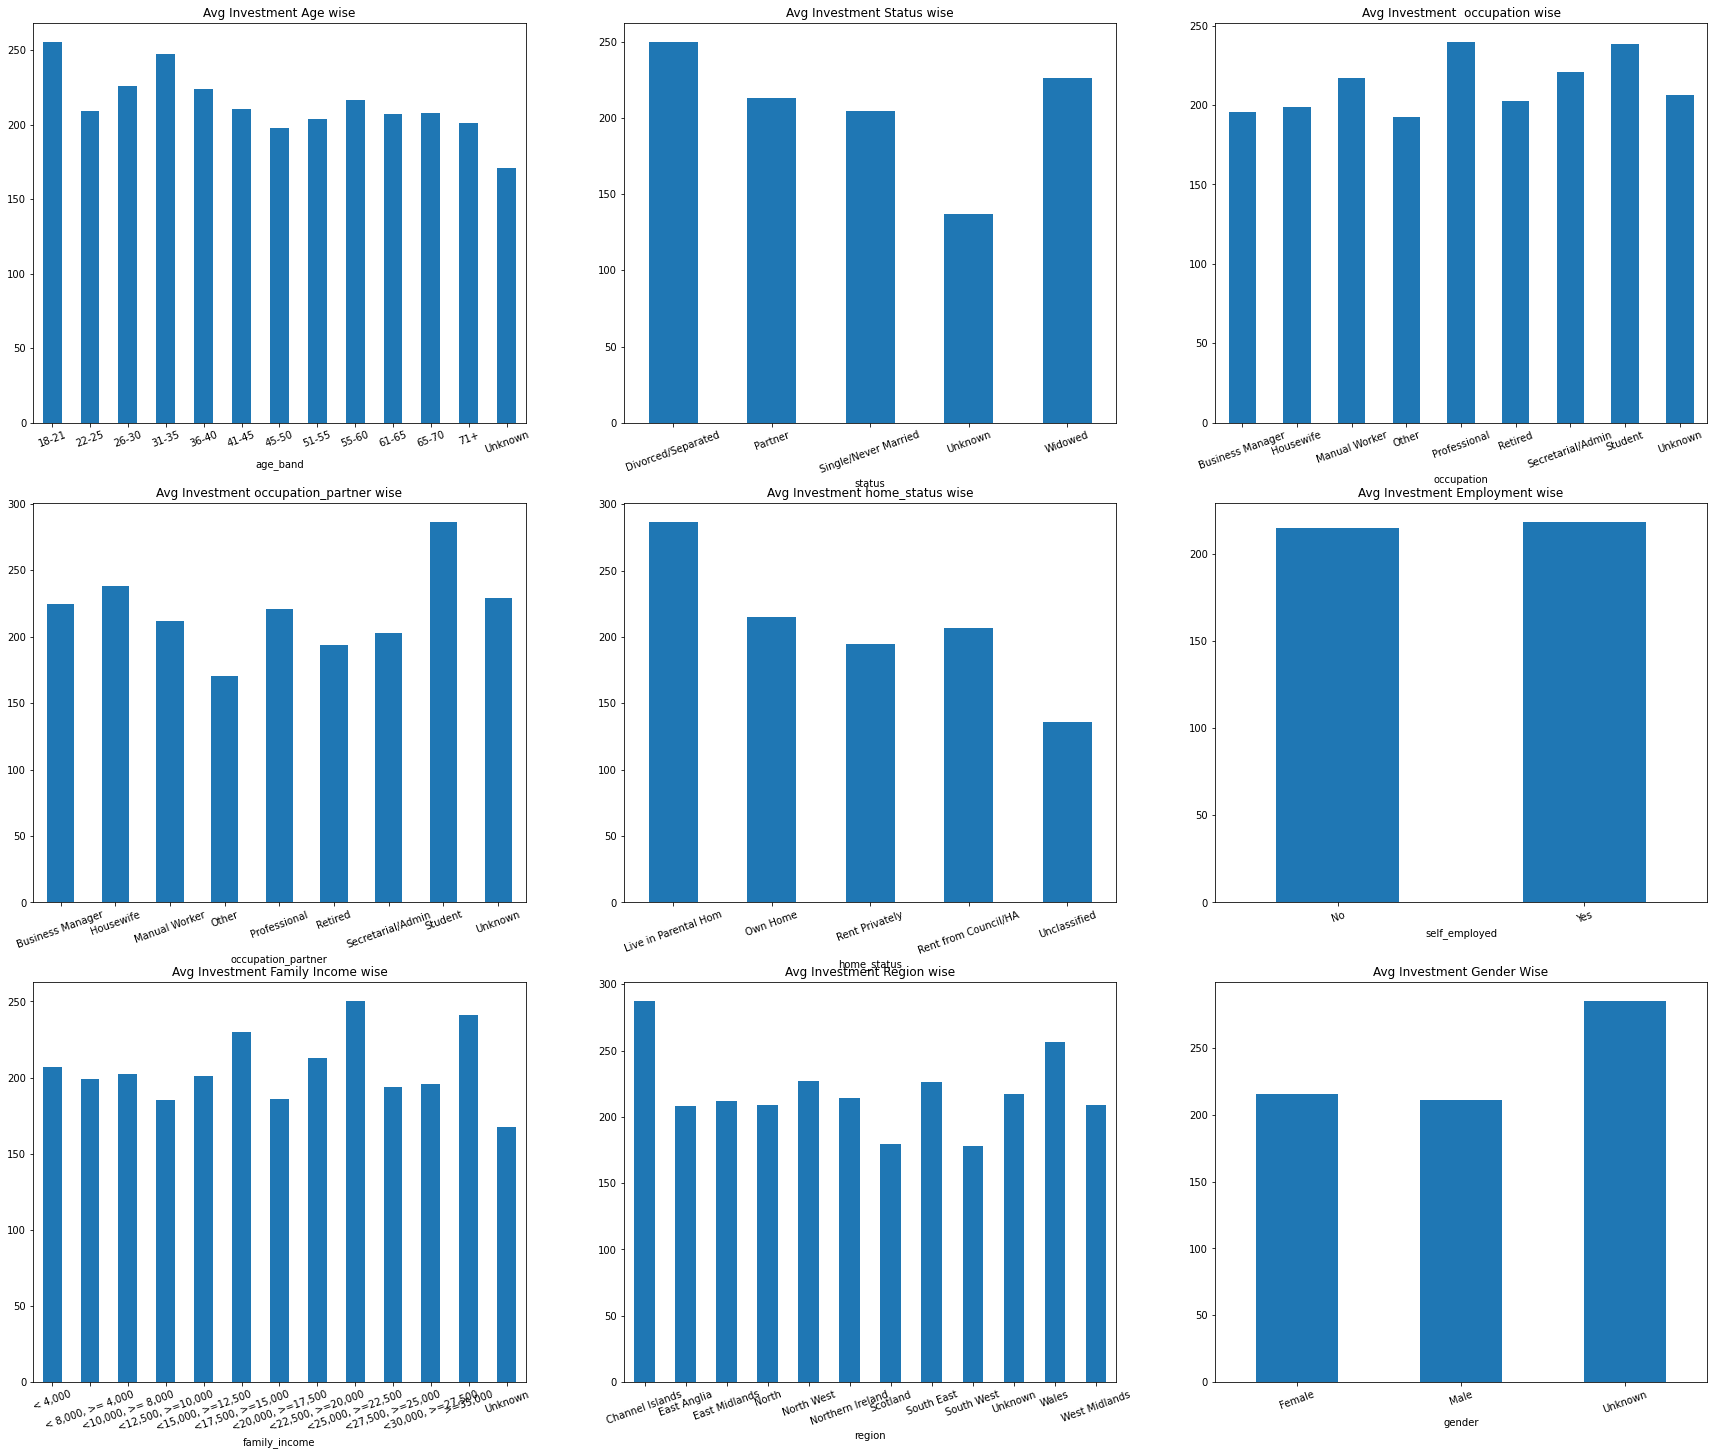

In [ ]:
fig=plt.figure(figsize=[30,25])

plt.subplot(3,3,1)
data[data.Revenue_Grid==1].groupby("age_band")["TotalInvestment"].mean().plot.bar()
plt.title("Avg Investment Age wise")
plt.xticks(rotation=20)

plt.subplot(3,3,2)
data[data.Revenue_Grid==1].groupby("status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Status wise")

plt.subplot(3,3,3)
data[data.Revenue_Grid==1].groupby("occupation")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment  occupation wise")

plt.subplot(3,3,4)
data[data.Revenue_Grid==1].groupby("occupation_partner")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment occupation_partner wise")

plt.subplot(3,3,5)
data[data.Revenue_Grid==1].groupby("home_status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment home_status wise")

plt.subplot(3,3,6)
data[data.Revenue_Grid==1].groupby("self_employed")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Employment wise")

plt.subplot(3,3,7)
data[data.Revenue_Grid==1].groupby("family_income")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Family Income wise")

plt.subplot(3,3,8)
data[data.Revenue_Grid==1].groupby("region")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Region wise")

plt.subplot(3,3,9)
data[data.Revenue_Grid==1].groupby("gender")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Gender Wise")

## **Analyzing parameters of Low worth Customer (Revenue_Grid=2)**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

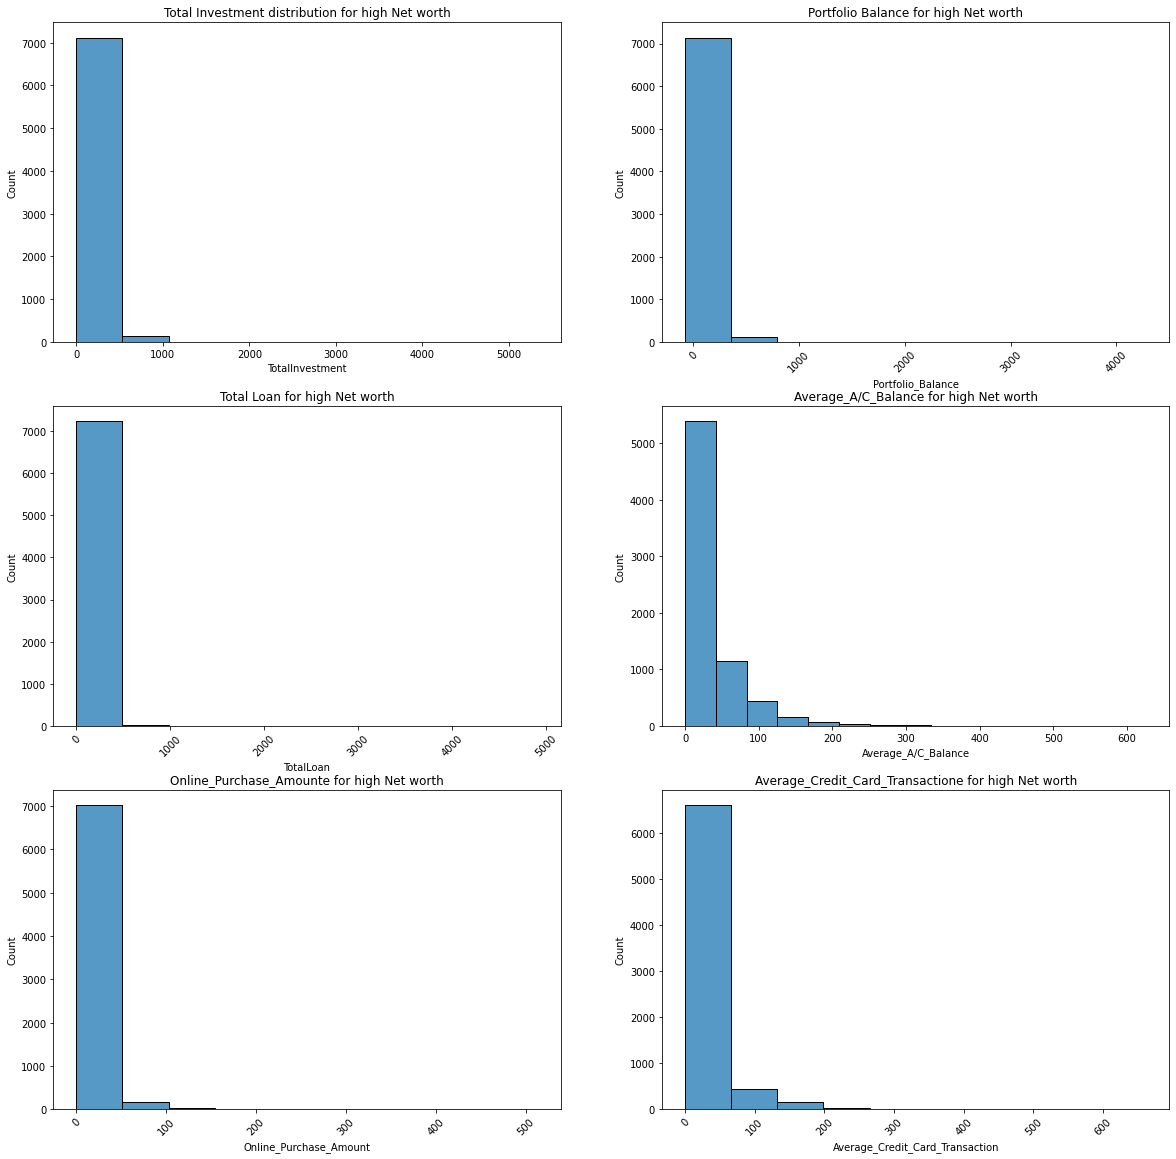

In [ ]:
fig=plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.histplot(x="TotalInvestment",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Total Investment distribution for high Net worth")

plt.subplot(3,2,2)
sns.histplot(x="Portfolio_Balance",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Portfolio Balance for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,3)
sns.histplot(x="TotalLoan",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Total Loan for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,4)
sns.histplot(x="Average_A/C_Balance",bins=15, data=data[data.Revenue_Grid==2])
plt.title("Average_A/C_Balance for high Net worth")

plt.subplot(3,2,5)
sns.histplot(x="Online_Purchase_Amount",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Online_Purchase_Amounte for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,6)
sns.histplot(x="Average_Credit_Card_Transaction",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Average_Credit_Card_Transactione for high Net worth")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Avg Investment Gender Wise')

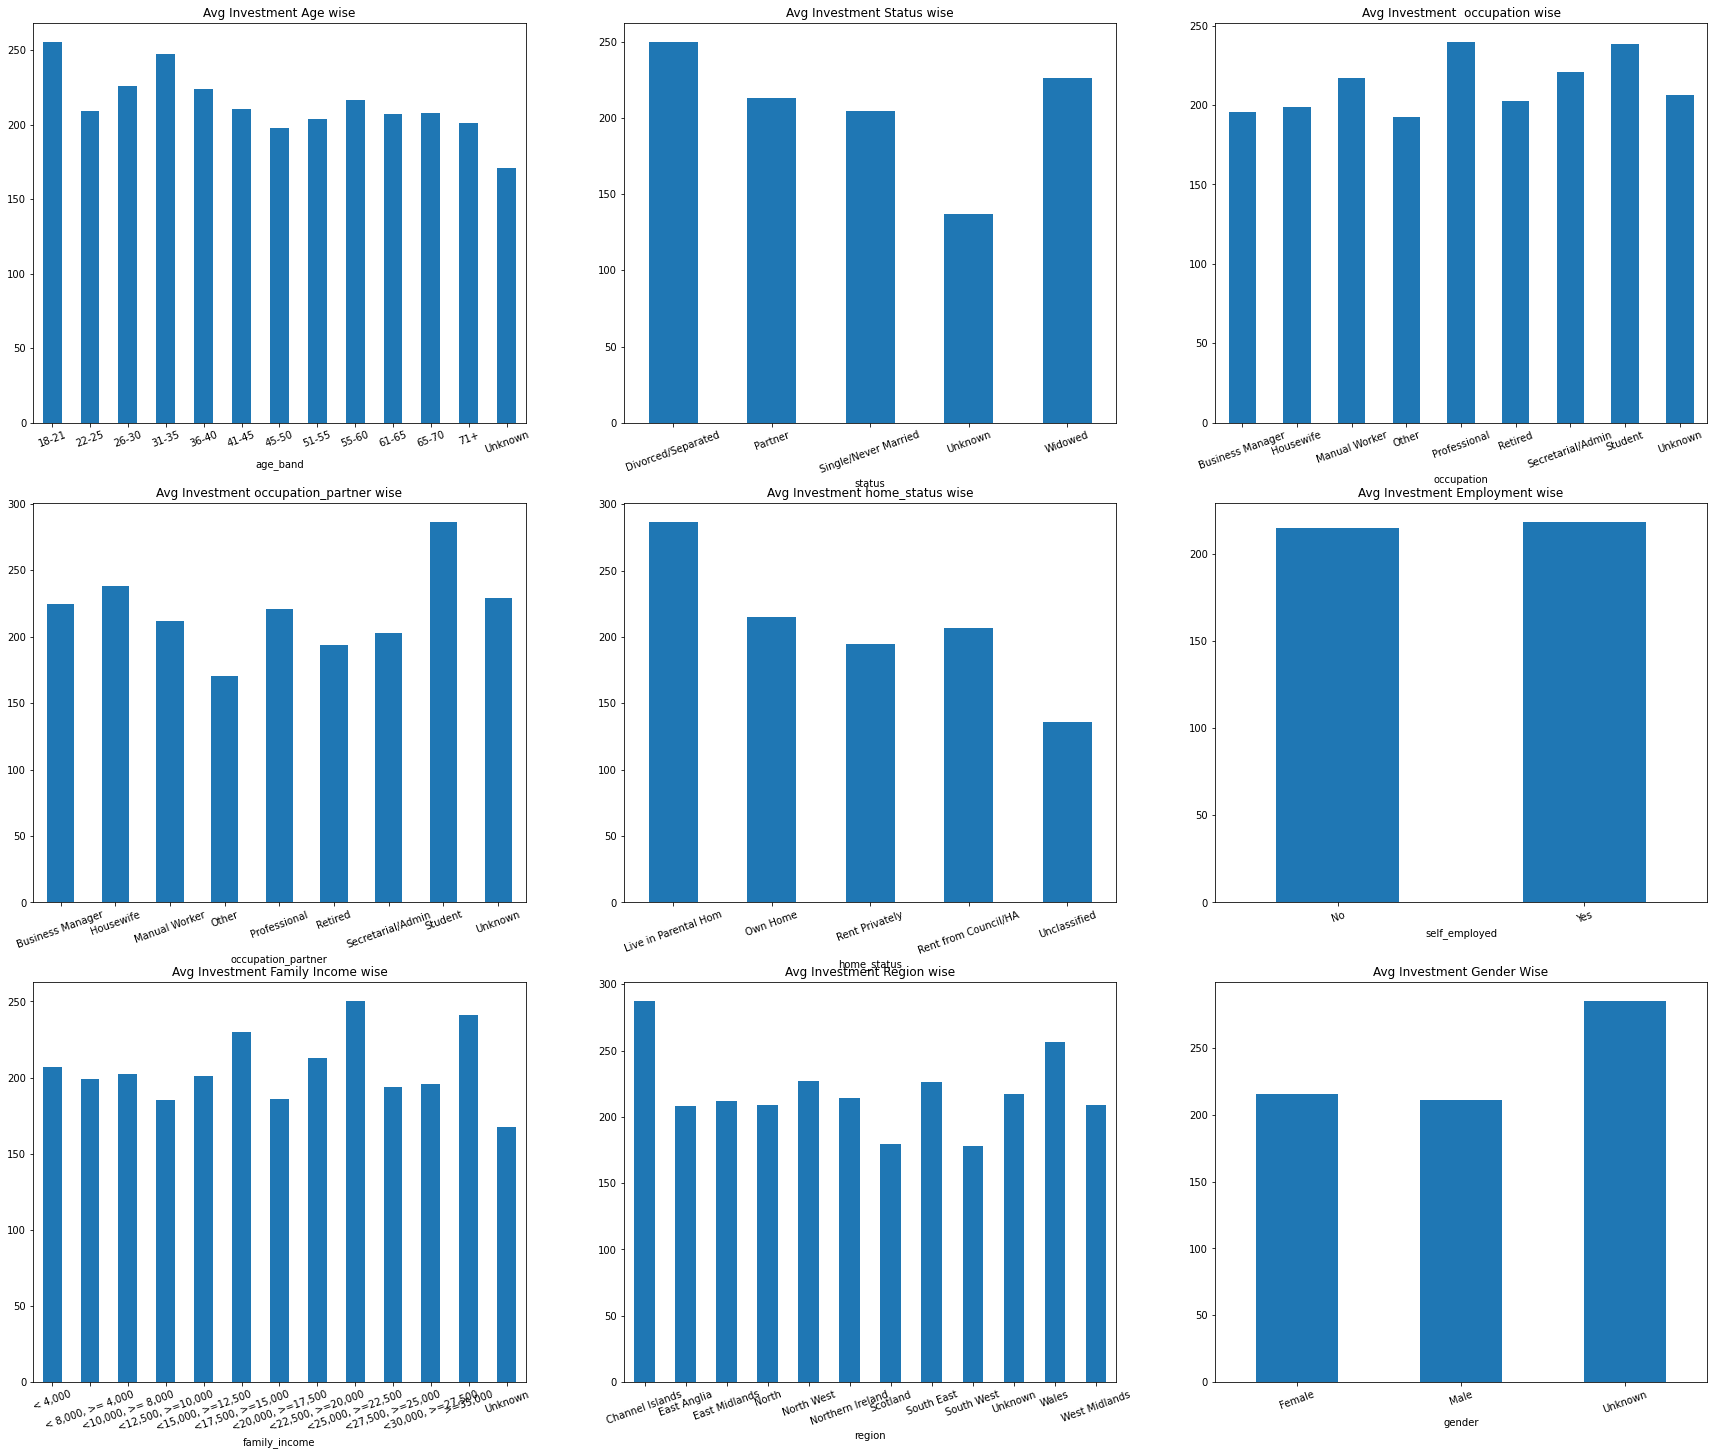

In [ ]:
fig=plt.figure(figsize=[30,25])

plt.subplot(3,3,1)
data[data.Revenue_Grid==2].groupby("age_band")["TotalInvestment"].mean().plot.bar()
plt.title("Avg Investment Age wise")
plt.xticks(rotation=20)

plt.subplot(3,3,2)
data[data.Revenue_Grid==2].groupby("status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Status wise")

plt.subplot(3,3,3)
data[data.Revenue_Grid==2].groupby("occupation")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment  occupation wise")

plt.subplot(3,3,4)
data[data.Revenue_Grid==2].groupby("occupation_partner")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment occupation_partner wise")

plt.subplot(3,3,5)
data[data.Revenue_Grid==1].groupby("home_status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment home_status wise")

plt.subplot(3,3,6)
data[data.Revenue_Grid==1].groupby("self_employed")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Employment wise")

plt.subplot(3,3,7)
data[data.Revenue_Grid==2].groupby("family_income")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Family Income wise")

plt.subplot(3,3,8)
data[data.Revenue_Grid==2].groupby("region")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Region wise")

plt.subplot(3,3,9)
data[data.Revenue_Grid==2].groupby("gender")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Gender Wise")

## **Check Multicolinearity**

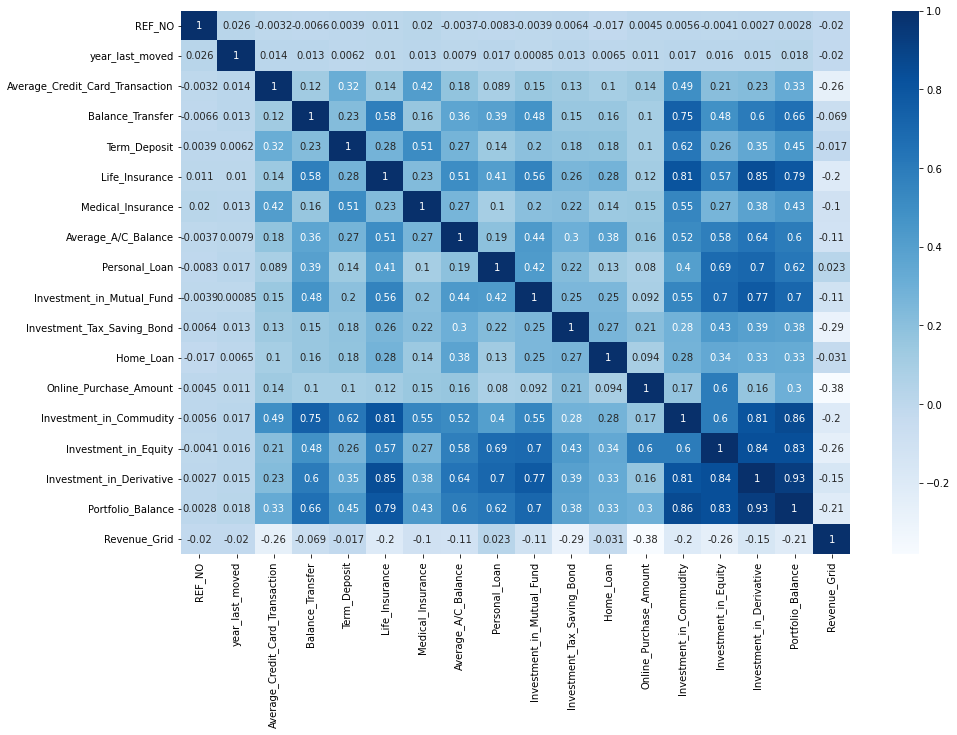

In [9]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="white")


# **7. Data Preparation**

## **Feature Selection**

In [4]:
features=["Average_Credit_Card_Transaction","Balance_Transfer","Life_Insurance","Medical_Insurance","Average_A/C_Balance","Personal_Loan","Home_Loan","Online_Purchase_Amount","Portfolio_Balance"]
X=data[features]
y=data.Revenue_Grid
dataValidationId=dataValidation.REF_NO
dataValidation=dataValidation[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average_Credit_Card_Transaction  8124 non-null   float64
 1   Balance_Transfer                 8124 non-null   float64
 2   Life_Insurance                   8124 non-null   float64
 3   Medical_Insurance                8124 non-null   float64
 4   Average_A/C_Balance              8124 non-null   float64
 5   Personal_Loan                    8124 non-null   float64
 6   Home_Loan                        8124 non-null   float64
 7   Online_Purchase_Amount           8124 non-null   float64
 8   Portfolio_Balance                8124 non-null   float64
dtypes: float64(9)
memory usage: 571.3 KB


## **Check Data Imbalance**

In [16]:
y.value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

## **Apply Smote**

In [5]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y == 2)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)

X, y = sm.fit_resample(X, y)
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))

Before OverSampling, counts of label '1': 860
Before OverSampling, counts of label '2': 7264 

After OverSampling, counts of label '1': 7264
After OverSampling, counts of label '2': 7264


# **8. Model Development & Evaluation**

In [10]:
myScaler=RobustScaler()
modelLR=LogisticRegression()
col_trans=make_column_transformer((myScaler,X.columns))
pipe=make_pipeline(col_trans,modelLR)
kf=KFold(5,shuffle=True,random_state=1)
cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="accuracy",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
print(cv_score_df)
print(cv_score_df.mean())
pipe.fit(X,y)


   fit_time  score_time  test_score  train_score
0  0.081139    0.005947    0.869236     0.864653
1  0.083438    0.009924    0.856160     0.869558
2  0.077695    0.005766    0.858568     0.867407
3  0.072449    0.006960    0.872978     0.865697
4  0.049445    0.003861    0.874699     0.865353
fit_time       0.072833
score_time     0.006492
test_score     0.866328
train_score    0.866534
dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Life_Insurance',
       'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan',
       'Home_Loan', 'Online_Purchase_Amount', 'Portfolio_Balance'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

# **9. Dump Model using Pickle**

In [11]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/custclass_estimator.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [14]:
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/custclass_estimator.pkl', 'rb') as f_in:
    model = pickle.load(f_in)
testData=dataValidation
dataValidation_pred=model.predict(testData)

submission = pd.DataFrame({'id':dataValidationId,'Rev_grid':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')